In [1]:
import magnetic_boundaries as mb
import numpy as np
from scipy.ndimage import gaussian_filter
from math import pi
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla
import matplotlib.colors as mcolors

# Vector potential

3.8250652645288596e-16


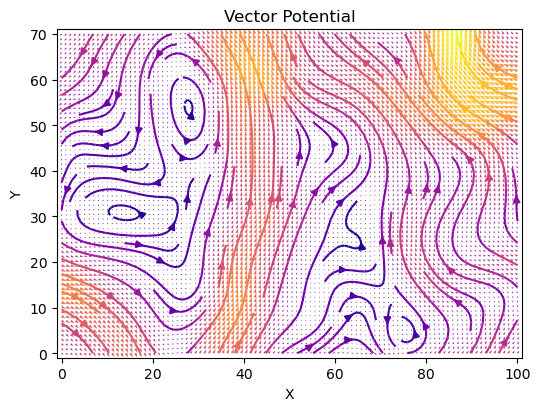

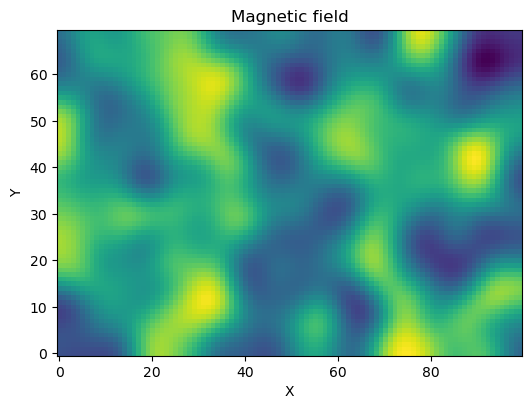

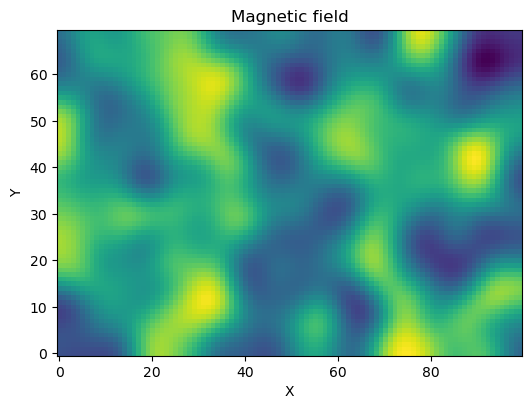

In [4]:
nx = 100
ny = 70
uniform = 2*pi/(nx*ny) #One flux quantum in the system
noise = 100*uniform


fluxes = uniform*np.ones((ny,nx))+noise*(np.random.rand(ny,nx)-np.ones((ny,nx))/2)
fluxes = gaussian_filter(fluxes, sigma=np.sqrt(nx*ny)/20)

a_e, a_n = mb.vector_potential(nx,ny,fluxes, gauge = "C4")

mb.plot_A(a_e,a_n)
recover_flux = mb.recover_field(a_e,a_n)
print(np.max(fluxes- recover_flux))
mb.plot_B(fluxes)
mb.plot_B(recover_flux)

# Rectangle

Text(0.5, 1.0, 'Lattice')

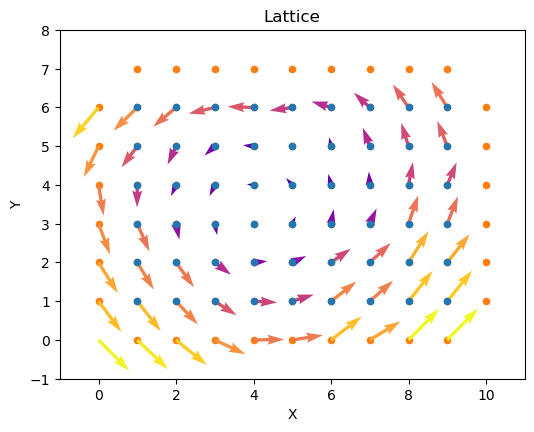

In [4]:
Lx = 10
Ly = 7
fluxes = np.random.rand(Ly,Lx)/1000
a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "C4")

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    theta = 0,
    a_e = a_e,
    a_n = a_n,
    mass = 0
)

Phi, H, P, deleted_indices, spinup_shape, spindown_shape = mb.operators_rectangle(parameters, return_shape = True)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
# Define a grid of points
x = np.linspace(0, Lx-1, Lx) 
y = np.linspace(0, Ly-1, Ly)  
X, Y = np.meshgrid(x, y)    # Create a meshgrid for plotting
ax.quiver(X, Y, a_e[:-1,:], a_n[:,:-1],np.sqrt(a_e[:-1,:]**2 + a_n[:,:-1]**2),cmap="plasma") #The right and top edges are left out of the plot
ax.scatter(spinup_shape[0],spinup_shape[1], s = 20)
ax.scatter(spindown_shape[0],spindown_shape[1], s = 20,zorder=-1)
#ax.imshow(fluxes,extent=[0, Lx, 0, Ly],zorder = -2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-1,Lx+1)
ax.set_ylim(-1,Ly+1)
ax.set_aspect('equal')
ax.set_title('Lattice')

[20, 21, 25, 40, 50, 57, 67, 80]
0
1
2
3
4
5
6
7


Text(0.5, 1.0, 'First five eigenvalues with $m = 1$')

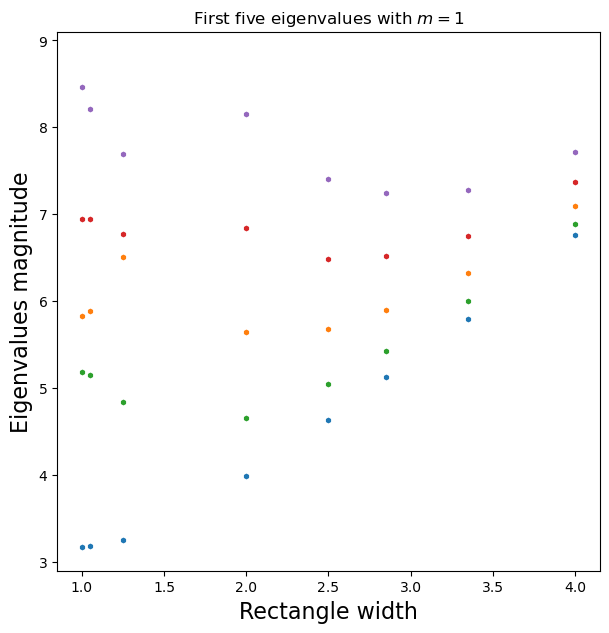

In [3]:
scale_factor = 20

area = scale_factor*scale_factor 
nbands = 10
parameters = dict()
parameters['theta'] = -pi/2
parameters['mass'] = 1/scale_factor

flux_quanta = 0
magnetic_field = 2*pi/area*flux_quanta


sides = [x for x in range(scale_factor,5*scale_factor,1) if abs(x*round(scale_factor**2/x)/(scale_factor**2)-1)<0.005]
print(sides)

spectrum = np.zeros((len(sides),nbands))
for i,side in enumerate(sides):
    print(i)
    Lx = side
    Ly = round(area/Lx)
    parameters['Lx'] = Lx
    parameters['Ly'] = Ly
    fluxes = magnetic_field*np.ones((Ly,Lx))
    a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "C4")
    parameters['a_e'] = a_e
    parameters['a_n'] = a_n
    
    ener, states, degenerate_indices = mb.solve_eigenproblem_rectangle(parameters, number_of_bands = nbands, plot_shape=False)
    spectrum[i] = np.sort(ener)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
colors = ['C0','C0','C0','C0','C0','C0','C2','C1','C3','C4']
for i in range(nbands):
    ax.scatter(np.array(sides)/scale_factor,scale_factor*spectrum[:,i],c = colors[i], s = 10, marker = 'h')
ax.set_ylim(2.9,9.1)
ax.set_xlabel('Rectangle width', fontsize = 16)
ax.set_ylabel('Eigenvalues magnitude', fontsize = 16)
ax.set_title(r'First five eigenvalues with $m = 1$', fontsize = 12)

# Ribbon

ArpackError: ARPACK error 3: No shifts could be applied during a cycle of the Implicitly restarted Arnoldi iteration. One possibility is to increase the size of NCV relative to NEV. 

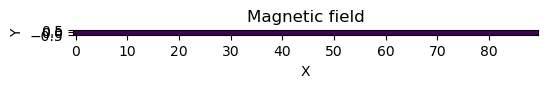

In [187]:
Lx = 90
Ly = 1
quanta = 0.2*Lx*Ly
noise = 0

fluxes = quanta*2*pi/(Lx*Ly)*np.ones((Ly,Lx)) + noise*quanta*(np.random.rand(Ly,Lx)-0.5)/(Lx*Ly)
fluxes = fluxes - (np.sum(fluxes)-2*pi*quanta)/(Lx*Ly)
mb.plot_B(fluxes)
a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "Landau")

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    # theta_top = pi-0.01,
    # theta_bot = pi-0.01,
    theta_top = 0,
    theta_bot = 0,
    a_e = a_e,
    a_n = a_n,
    mass = 0,
    kx = 0
)


nbands = 50
kmin = -pi/Lx
kmax = pi/Lx
momenta, bands = mb.make_bands_x(parameters,number_of_bands = nbands, number_of_points = int(501), kmin = kmin, kmax = kmax)

In [ ]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
for i in range(nbands):
    ax.scatter(momenta, bands[:,i]/(np.sqrt((4*pi*quanta/Lx/Ly)) if abs(quanta) >=0.01  else 1), c = 'C0', s = 0.5)
ax.set_xlabel(r"$k$ $(a^{-1})$",fontsize = 16)
ax.set_xlim(kmin,kmax)
if abs(quanta) < 0.01:
    ax.set_ylabel(r"$E$ $(\hbar v/a)$",fontsize = 16)
else:
    ax.set_ylabel(r"$E$ $(E_1)$",fontsize = 16)

ax.set_ylim(-3,3)

(-3.0, 3.0)

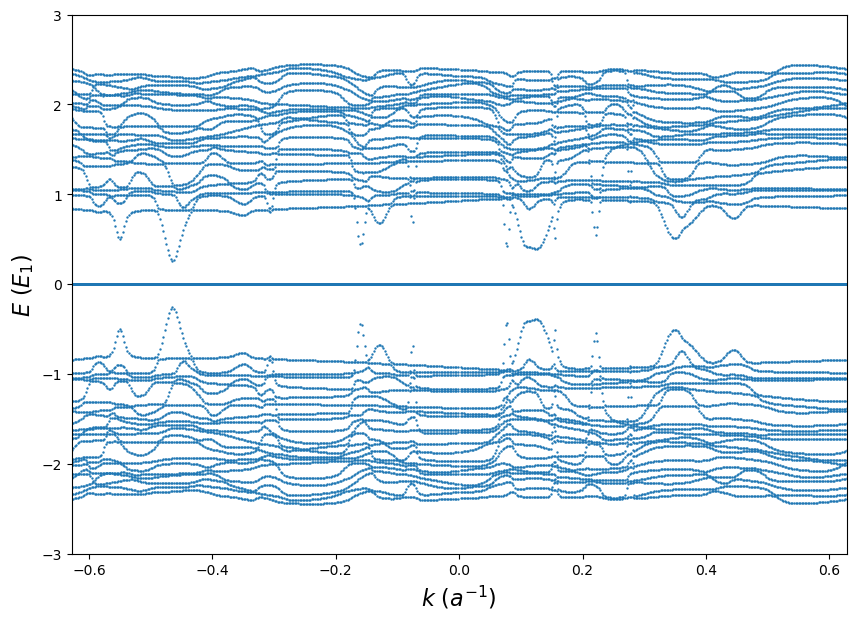

In [147]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
for i in range(nbands):
    ax.scatter(momenta, bands[:,i]/(np.sqrt((4*pi*quanta/Lx/Ly)) if abs(quanta) >=1  else 1), c = 'C0', s = 0.5)
ax.set_xlabel(r"$k$ $(a^{-1})$",fontsize = 16)
ax.set_xlim(kmin,kmax)
if abs(quanta) < 1:
    ax.set_ylabel(r"$E$ $(\hbar v/a)$",fontsize = 16)
else:
    ax.set_ylabel(r"$E$ $(E_1)$",fontsize = 16)

ax.set_ylim(-3,3)

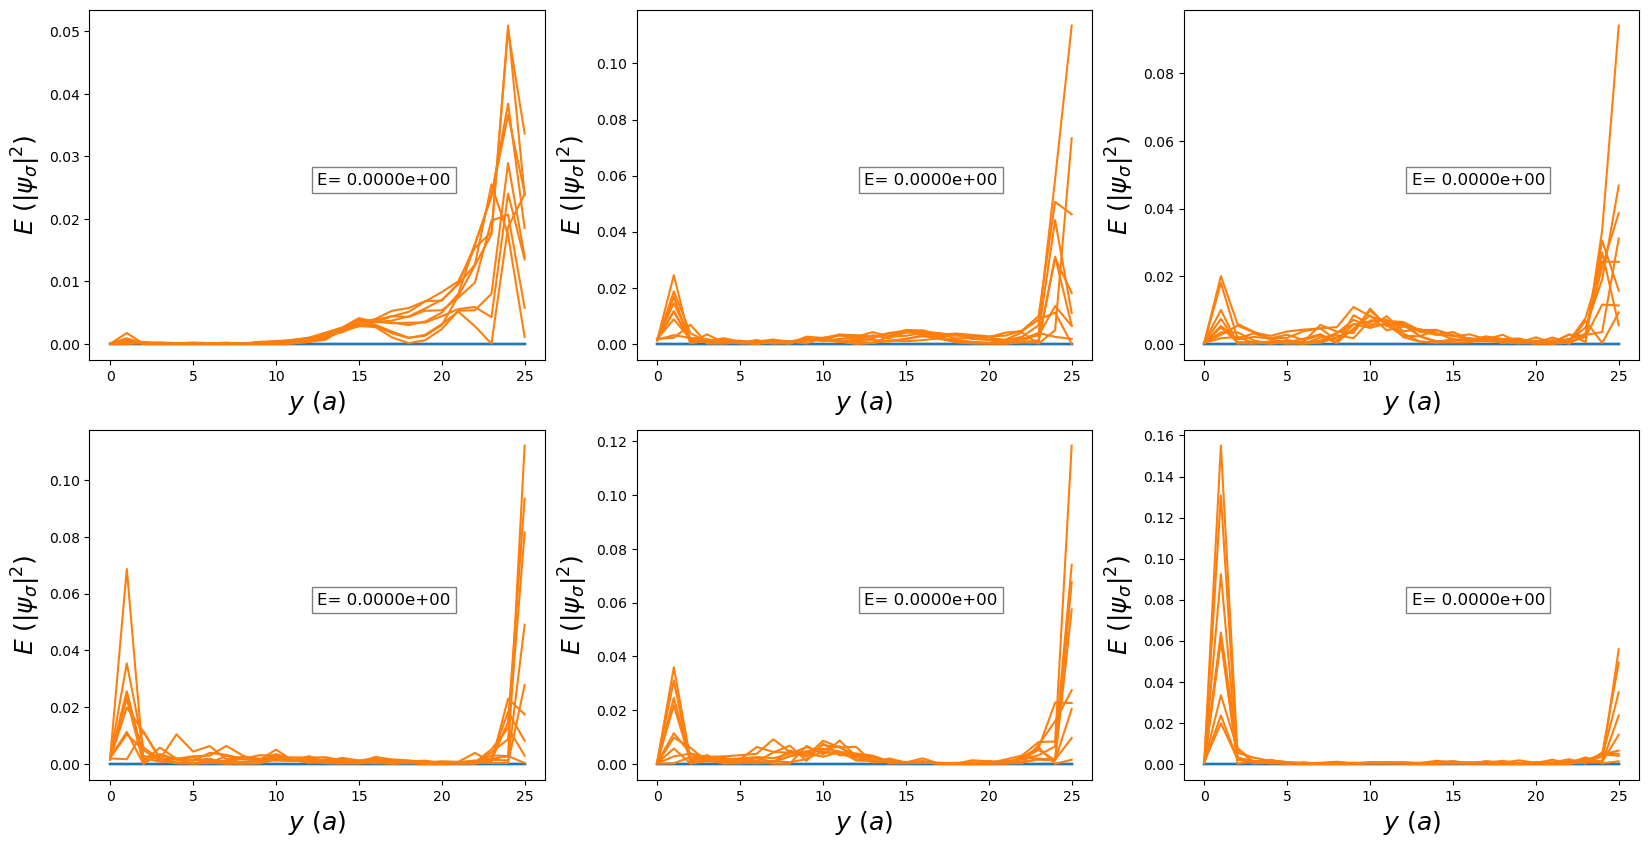

In [150]:
parameters['kx'] = 0
nbands = 22
energies, states, idx = make_states(parameters,number_of_bands = nbands)

#PLOT
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()
number_of_bands = 6
for i in range(number_of_bands):
    probability_density  = np.sum(np.abs((states[i]))**2,axis = 0)
    spin_up_density  = np.abs((states[i,0]))**2
    spin_down_density  = np.abs((states[i,1]))**2    
    
    axs[i].plot(spin_up_density, c = "C0")
    axs[i].plot(spin_down_density, c = "C1")
    axs[i].set_ylabel(r"$E$ $(|\psi_\sigma|^2)$",fontsize = 18)
    axs[i].set_xlabel(r"$y$ $(a)$",fontsize = 18)
   
    formatted_number = f"{energies[i]:.4e}"
    axs[i].text(0.5, 0.5, "E= "+str(formatted_number), transform=axs[i].transAxes,
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

Look at:
 - Bands for different field strengths, masses, Lxs. **Boundary conditions**
 - Bands when we include noise for different noise quanta through the system and Lxs
 - Eigenstates for for different field strengths, masses, Lxs. **Boundary conditions**. Here I should pay attention to how many edge modes and zero modes I expect.
 - Then repeat for a finite system


From what I see, the most interesting parameters to play with are
 - quanta
 - boundaries
 - noise


### There seems to be a stability problem. It would be nice to understand it better.

In [21]:
def make_states(parameters, number_of_bands = int(20)):
    '''Calculate eigenstates.'''
    theta_bot = parameters['theta_bot'] #float in (-pi,pi] Boundary condition angle on the bottom
    theta_top = parameters['theta_top'] #float in (-pi,pi] Boundary condition angle on the top
    Nx = Lx
    Ny = Ly+1
    #Solve generalised eigenproblem 
    Phi, H, P, deleted_indices = mb.operators_ribbon(parameters)
    eigenvalues, eigenvectors = sla.eigsh(H, M=P, k = number_of_bands, tol = 1e-7, sigma = 0.0000001, which = 'LM',return_eigenvectors = True)

    #Refill with zeros the deleted spins
    states = np.zeros((2*Nx*Ny,number_of_bands),dtype = complex)
    count = 0
    for index in range(2*Nx*Ny):
        if index not in deleted_indices:
            states[index] = (Phi@eigenvectors)[index-count]
        else:
            count += 1

    #Now make sure they are orthogonal
    overlaps = states.conjugate().transpose()@states
    ##The overlap can only be non-zero for degenerate states
    degenerate_indices = []
    bulk_indices = []    
    for i in range(overlaps.shape[0]):
        sorted = np.flip(np.sort(np.abs(overlaps[i])))
        if sorted[1]/sorted[0]<0.1: #This threshold (0.1) is a bit arbitrary
            bulk_indices.append(i)
        else:
            degenerate_indices.append(i)

    overlaps_deg = np.delete(overlaps, bulk_indices, axis=0)
    overlaps_deg = np.delete(overlaps_deg, bulk_indices, axis=1)
    overlaps_bulk = np.delete(overlaps, degenerate_indices, axis=0)
    overlaps_bulk = np.delete(overlaps_bulk, degenerate_indices, axis=1)

    states_deg = np.delete(states, bulk_indices, axis=1)
    states_bulk = np.delete(states, degenerate_indices, axis=1)

    evalues, orthogonal_coeff = np.linalg.eigh(overlaps_deg)
    orthogonal = np.append(states_deg@orthogonal_coeff, states_bulk , axis=1) #### These are finally the orthogonalised states
    norm = np.sqrt(np.diag(np.abs(orthogonal.conjugate().transpose()@orthogonal)))
    states = orthogonal/norm[None,:]
    
    # Rebuild state
    def spin_rotation(site, theta, phi):
        '''Returns a unitary transformation matrix that rotates the spin site to a theta,phi orientation'''
        rotation = np.identity(2*Nx*Ny, dtype = complex)
        
        spinup = int(site[0] + site[1]*Nx)
        spindown = int(site[0] + site[1]*Nx + Nx*Ny)
        
        rotation[spinup,spinup] = np.cos(theta/2)
        rotation[spinup,spindown] = np.sin(theta/2)
        rotation[spindown,spinup] = -np.sin(theta/2)*np.exp(1j*phi)
        rotation[spindown,spindown] = np.cos(theta/2)*np.exp(1j*phi)
        
        return csc_matrix(rotation)
        
    # We need to generate again the shape in order to refill the deleted sites
    edge_points, normal_angles = mb.generate_ribbon(Lx, Ly)
    # The parameter that we need for the spin rotation is the projection of the boundary spin on the plane, so the normal plus pi/2.
    boundary_spin_projections = normal_angles + np.ones(len(normal_angles))*pi/2

     # Rotate back the spins on the edge
    theta = np.concatenate((theta_top*np.ones(Lx), theta_bot*np.ones(Lx)))
    for point in zip(edge_points[0], edge_points[1], theta, boundary_spin_projections):
        #rotate
        rotation = spin_rotation([point[0],point[1]], point[2], point[3]) 
        states = rotation@states

    ### Reshape
    states_shaped = np.reshape(states.flatten('F'), newshape = (number_of_bands,2,Ny,Nx), order = 'C')

    ### Assign again energies
    energies = np.zeros(number_of_bands)
    for i in range(number_of_bands):
        if i in degenerate_indices:
            energies[i] = 0
        else:
            energies[i] = eigenvalues[i]

    return energies, states_shaped, degenerate_indices

# Graphene

In [14]:
parameters = {
    'width' : 150, # This is in units of 3a
    'bottom_bearded' : False,
    'top_bearded' : False,
    #'mag_field' : 0.0013
    # 'mag_field' : 0.0000003
    'mag_field' : 0
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 501)

/tmp/ipykernel_19249/1204660336.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[np.abs(energies[0])*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_19249/1204660336.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_19249/1204660336.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figstate.show()


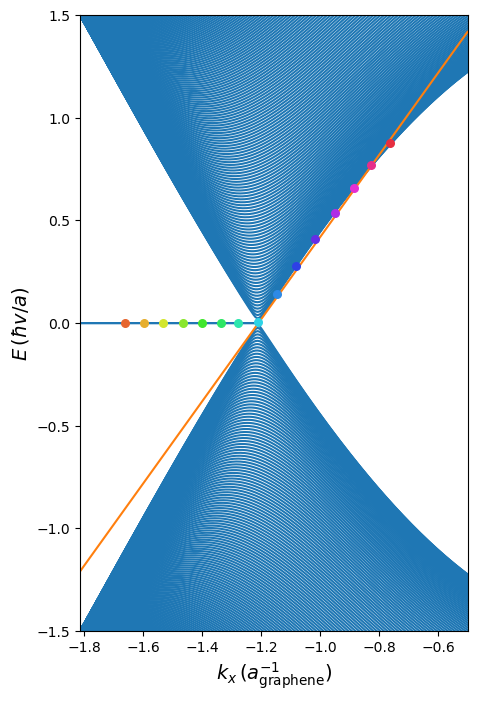

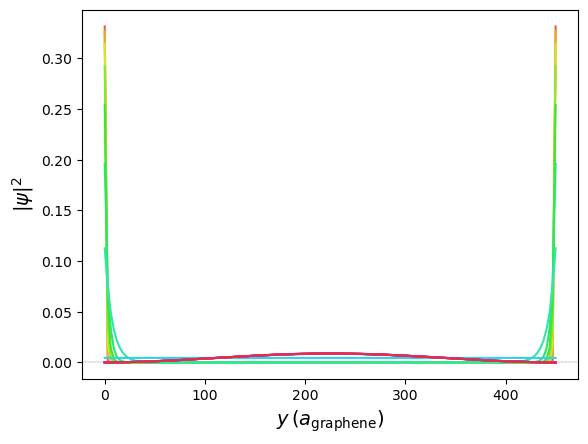

In [32]:
#Define color palette
rgb_colors = []
nplots = 15

for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))

#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i]*3/2, c = 'C0')

#ax.set_ylim(-0.5,0.5)
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)

ax.axline((-2*pi/np.sqrt(3)/3,0), slope=2, color='C1', label='by slope')#####################################################################################################

#Plot state
figstate = plt.figure()
axstate = figstate.add_subplot(111)
space = np.linspace(0,3*parameters['width'],parameters['width'])
axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)
    
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[np.abs(energies[0])*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[0]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[1]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

    #axstate.plot(space,np.abs(psi[0,:,state])**2 + np.abs(psi[2,:,state])**2) ## sublattice a
    #axstate.plot(space,np.abs(psi[1,:,state])**2 + np.abs(psi[3,:,state])**2) ## sublattice b
    axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    

fig.show()
figstate.show()

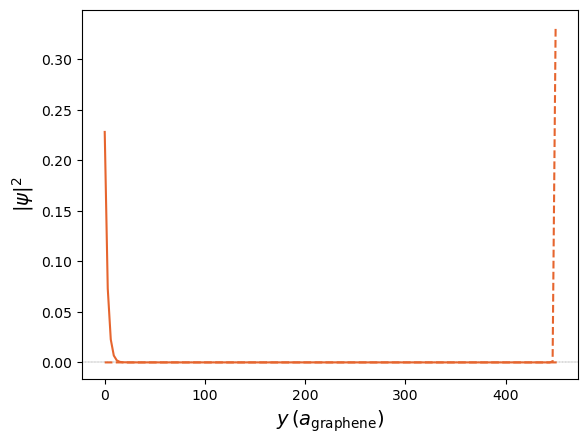

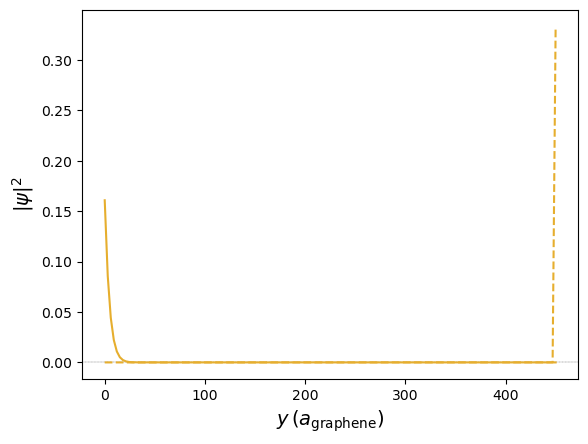

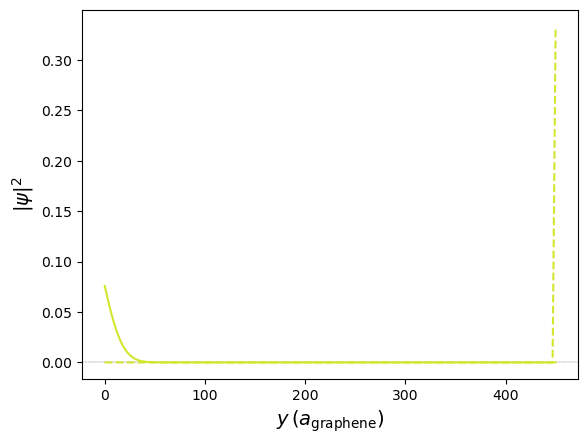

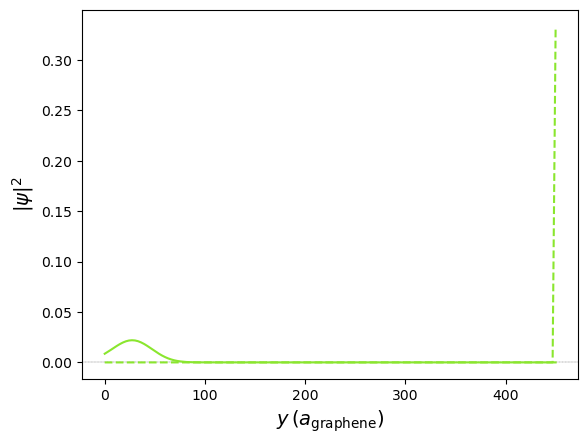

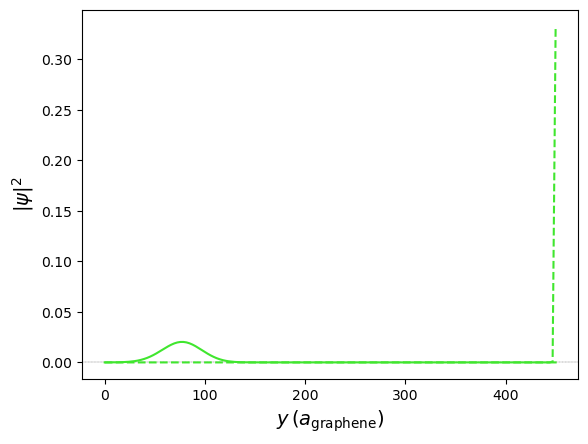

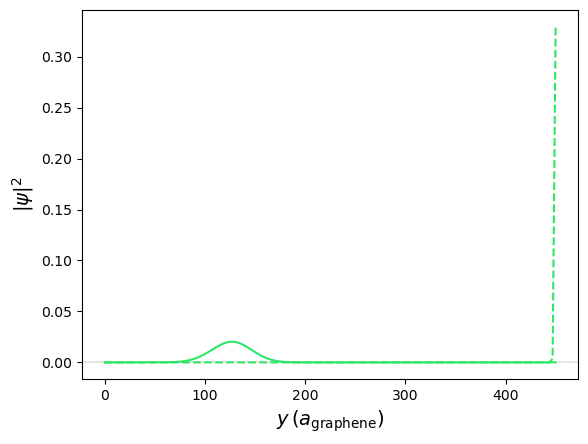

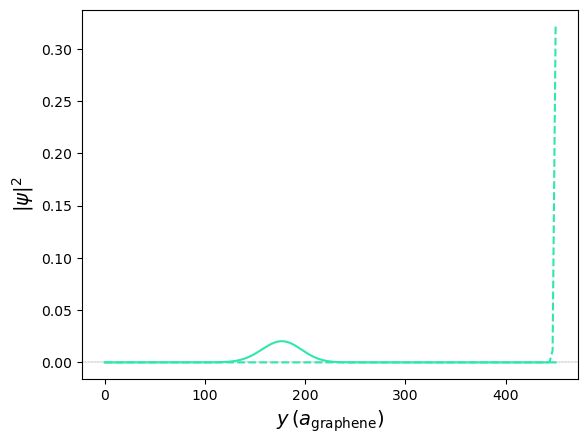

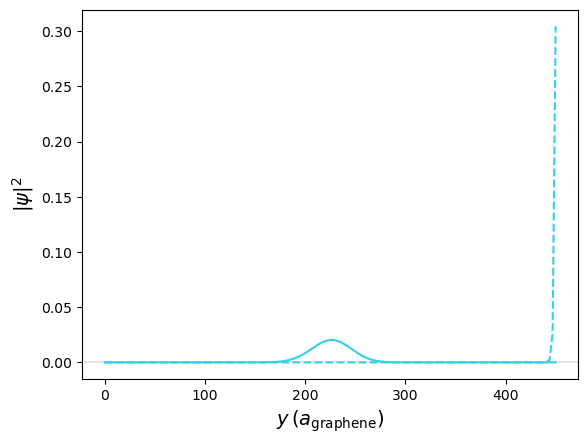

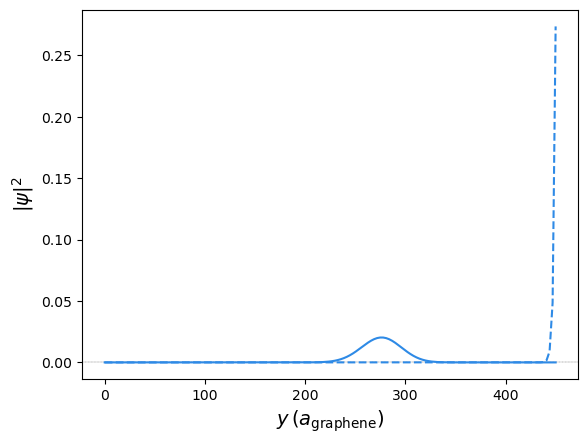

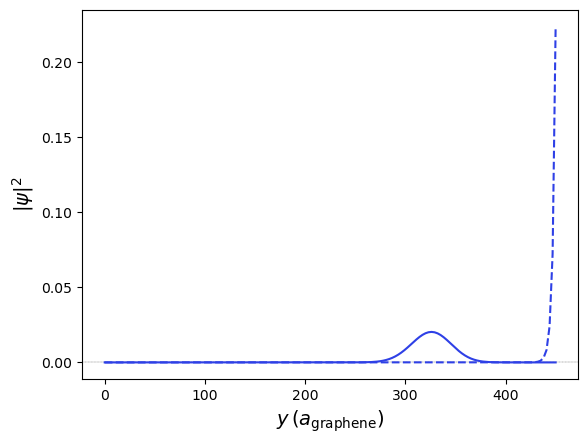

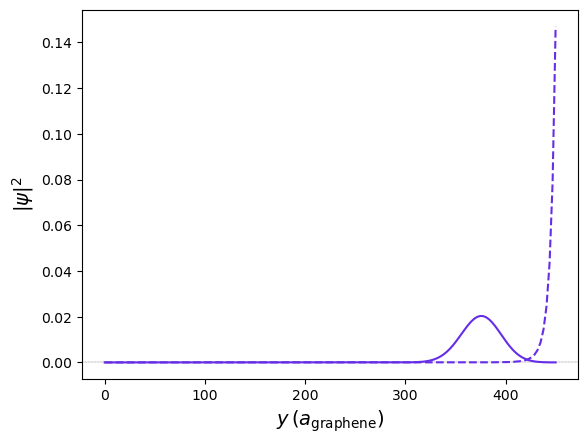

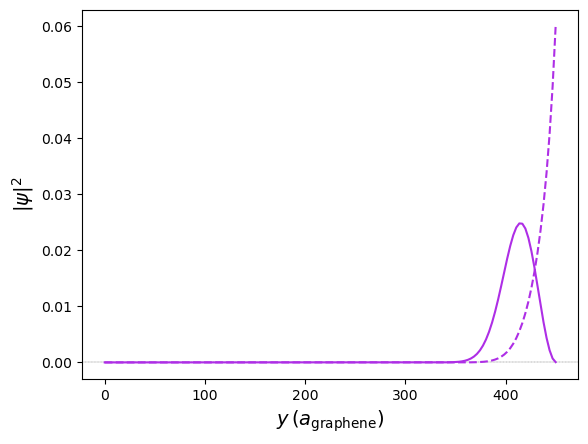

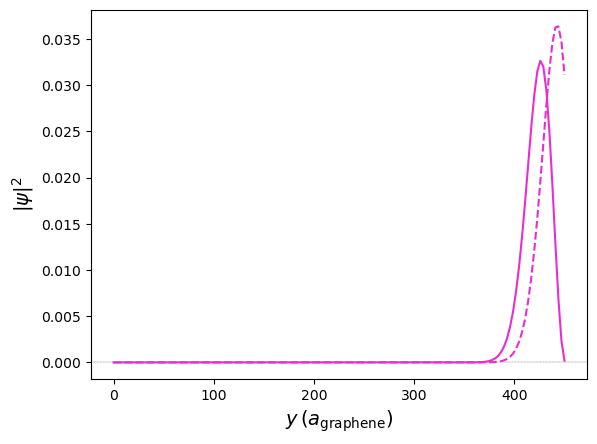

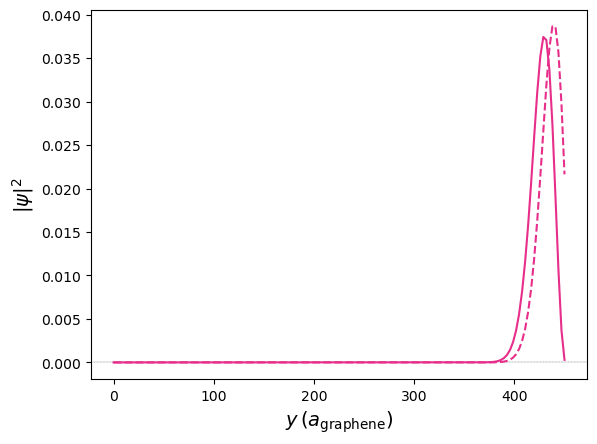

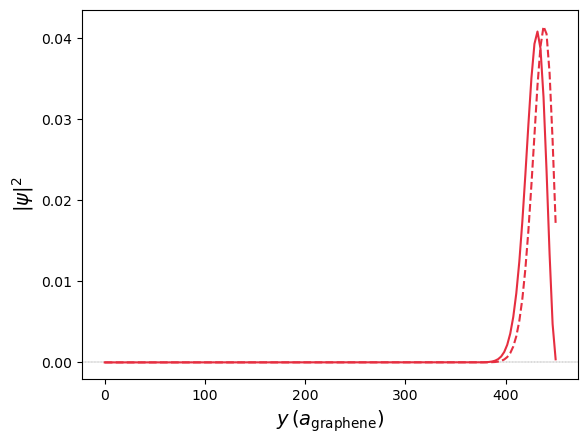

In [5]:
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):
    #Plot state
    figstate = plt.figure()
    axstate = figstate.add_subplot(111)
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3+np.abs(psi[0,:,1])**2/3 + np.abs(psi[2,:,1])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3+np.abs(psi[1,:,1])**2/3 + np.abs(psi[3,:,1])**2/3,c = rgb_colors[i]) ## sublattice b
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)
    

# I should do this for zero magnetic field and for different bcs

In [6]:
parameters = {
    'width' : 150, # This is in units of 3a
    'bottom_bearded' : False,
    'top_bearded' : True,
    'mag_field' : 0.0013
    # 'mag_field' : 0.0000003
    # 'mag_field' : 0
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 501)

/tmp/ipykernel_19249/1926175041.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_19249/1926175041.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_19249/1926175041.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figstate.show()


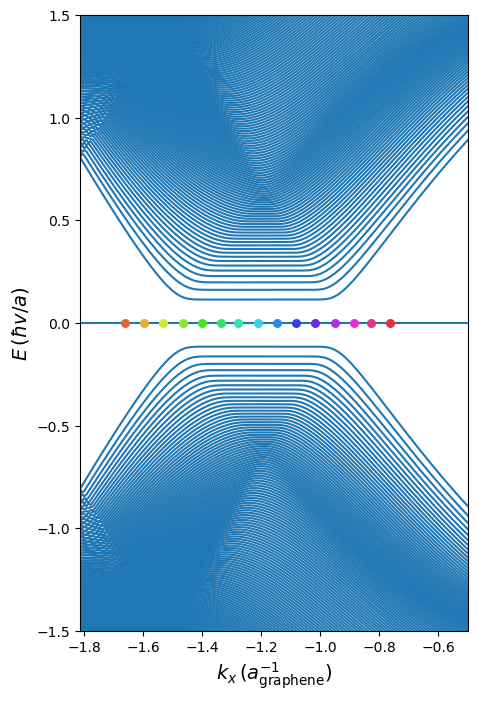

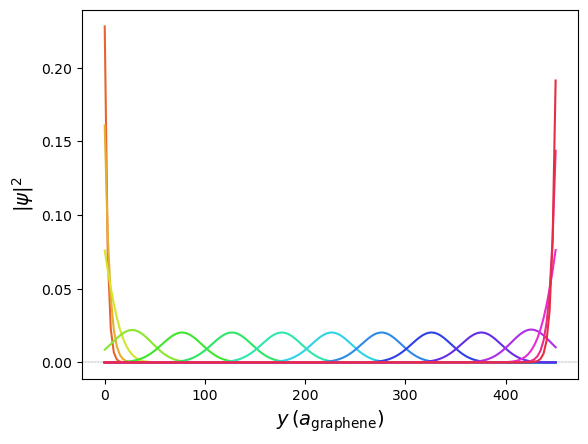

In [7]:
rgb_colors = []
nplots = 15

for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))

#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i]*3/2, c = 'C0')

#ax.set_ylim(-0.5,0.5)
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)

#Plot state
figstate = plt.figure()
axstate = figstate.add_subplot(111)
space = np.linspace(0,3*parameters['width'],parameters['width'])
axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)
    
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[energies[0]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

    #axstate.plot(space,np.abs(psi[0,:,state])**2 + np.abs(psi[2,:,state])**2) ## sublattice a
    #axstate.plot(space,np.abs(psi[1,:,state])**2 + np.abs(psi[3,:,state])**2) ## sublattice b
    axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3,axis = 0), c = rgb_colors[i])
    

fig.show()
figstate.show()

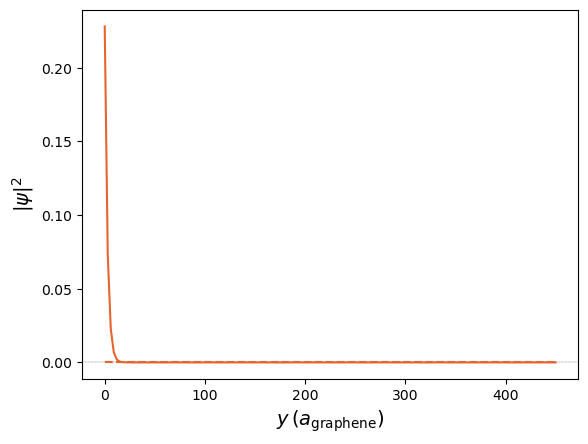

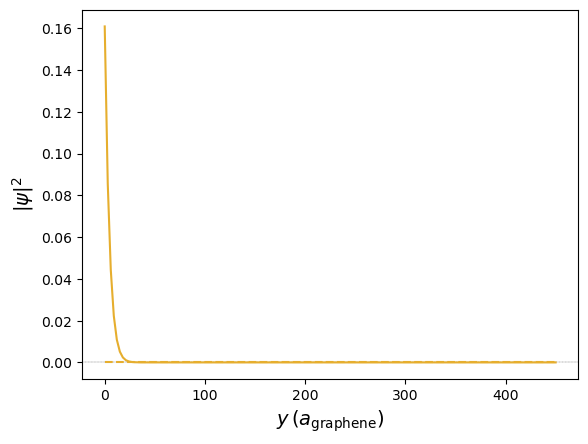

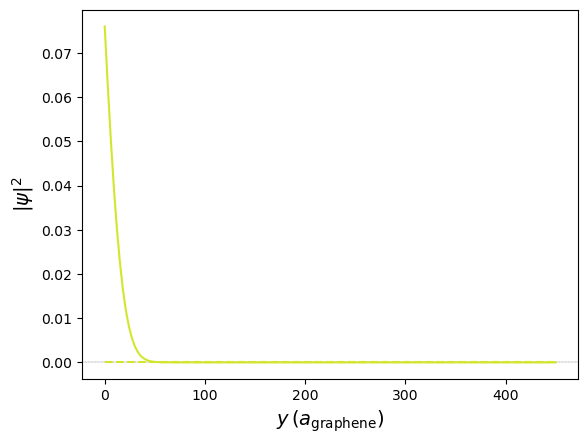

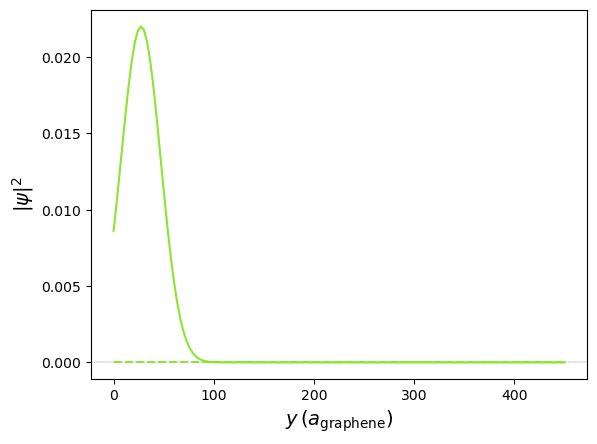

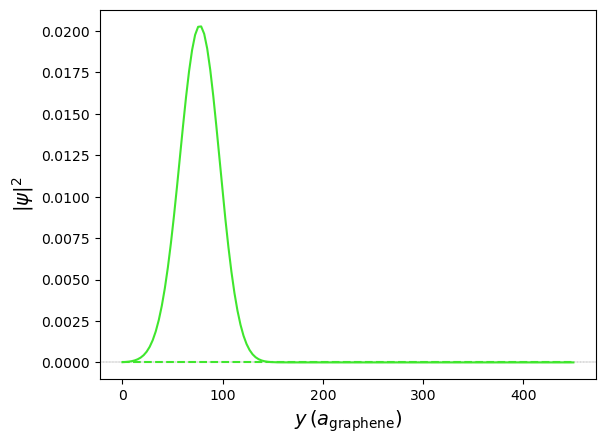

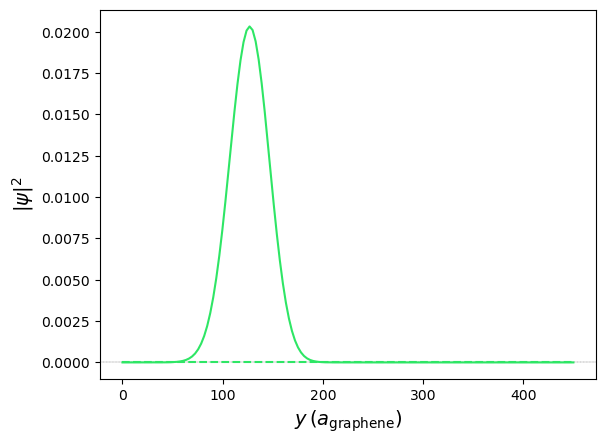

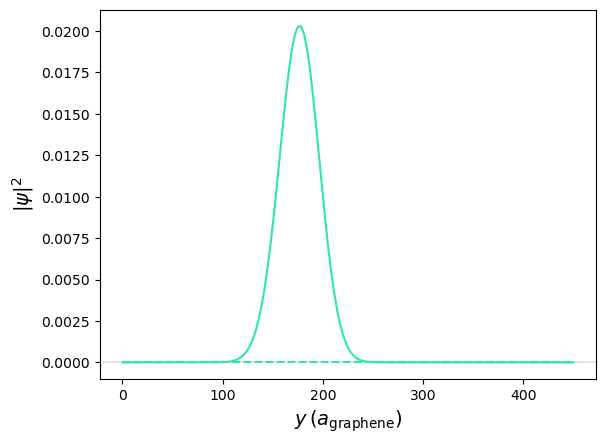

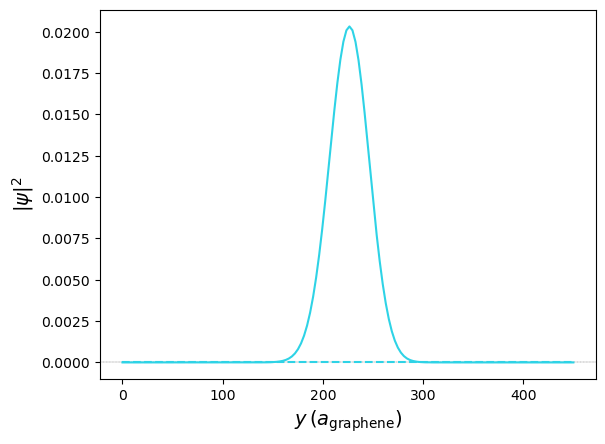

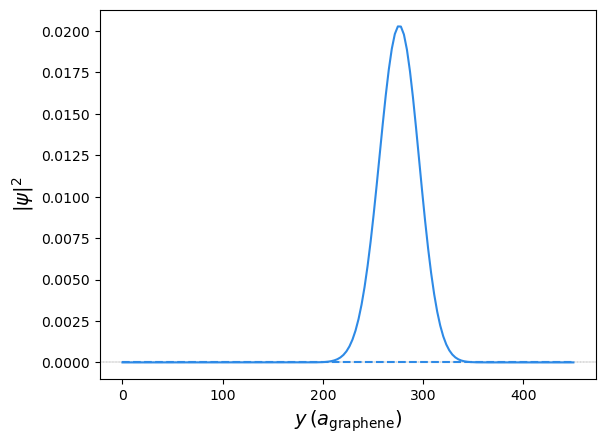

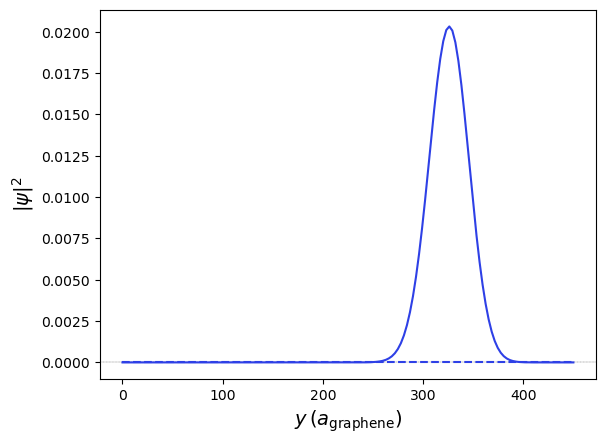

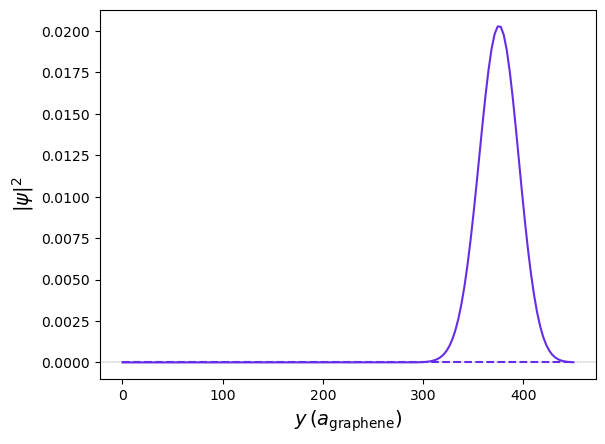

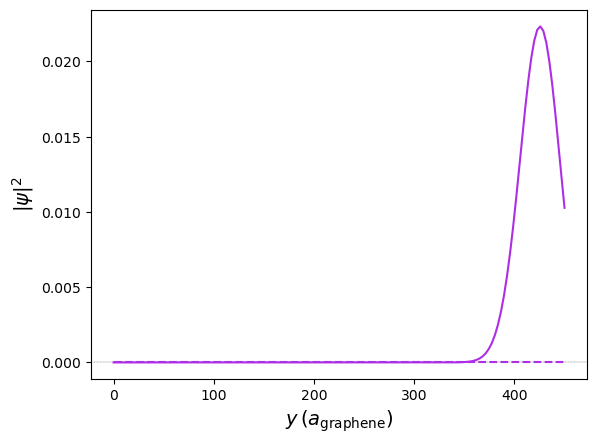

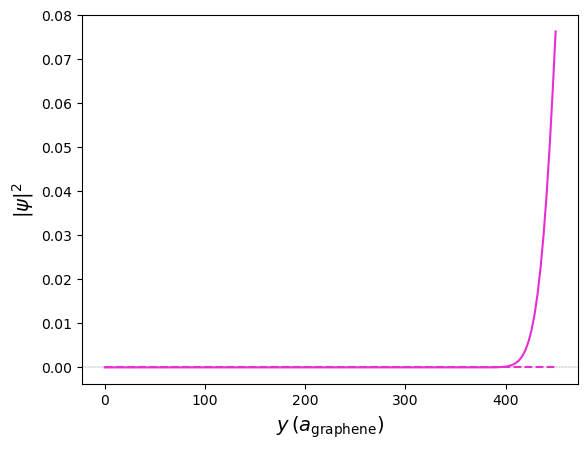

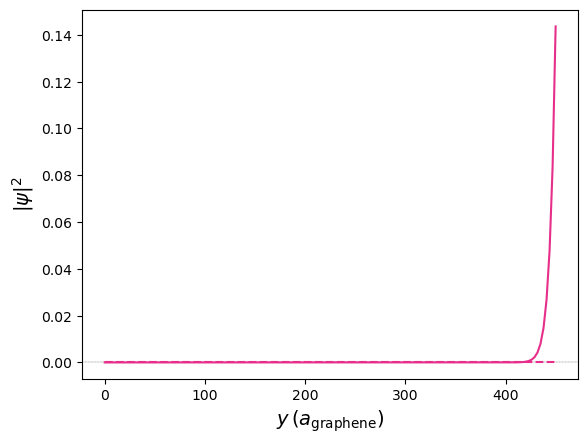

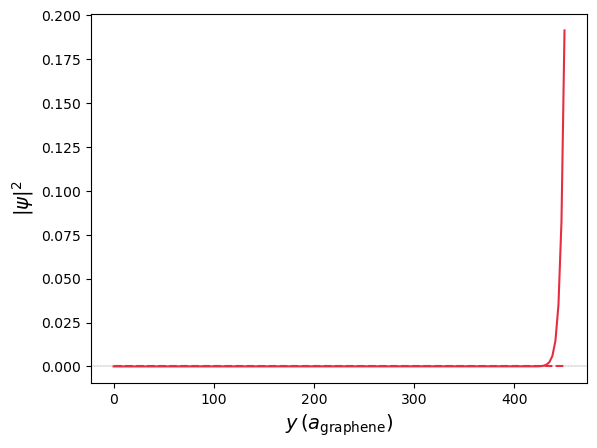

In [8]:
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):
    #Plot state
    figstate = plt.figure()
    axstate = figstate.add_subplot(111)
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3,c = rgb_colors[i]) ## sublattice b
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)

In [9]:
parameters = {
    'width' : 150, # This is in units of 3a
    'bottom_bearded' : True,
    'top_bearded' : False,
    'mag_field' : 0.0013
    # 'mag_field' : 0.0000003
    # 'mag_field' : 0
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 501)

/tmp/ipykernel_19249/3720969900.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_19249/3720969900.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[1]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_19249/3720969900.py:39: U

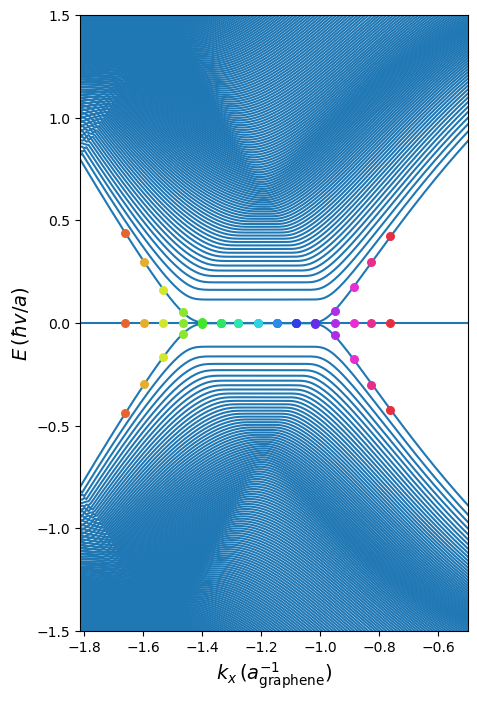

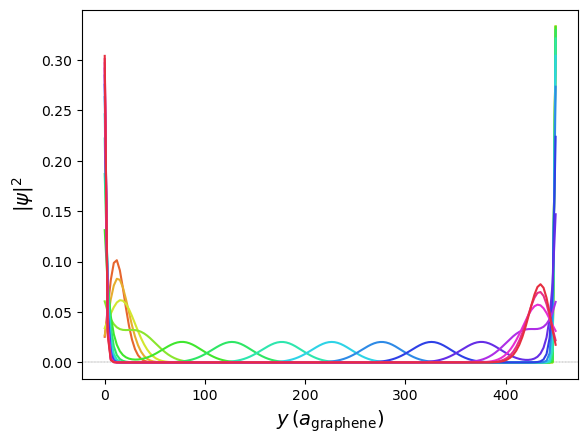

In [10]:
rgb_colors = []
nplots = 15

for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))

#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i]*3/2, c = 'C0')

#ax.set_ylim(-0.5,0.5)
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)

#Plot state
figstate = plt.figure()
axstate = figstate.add_subplot(111)
space = np.linspace(0,3*parameters['width'],parameters['width'])
axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)
    
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[energies[0]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[1]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[2]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

    #axstate.plot(space,np.abs(psi[0,:,state])**2 + np.abs(psi[2,:,state])**2) ## sublattice a
    #axstate.plot(space,np.abs(psi[1,:,state])**2 + np.abs(psi[3,:,state])**2) ## sublattice b
    axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3+np.abs(psi[:,:,2])**2/3,axis = 0), c = rgb_colors[i])
    

fig.show()
figstate.show()

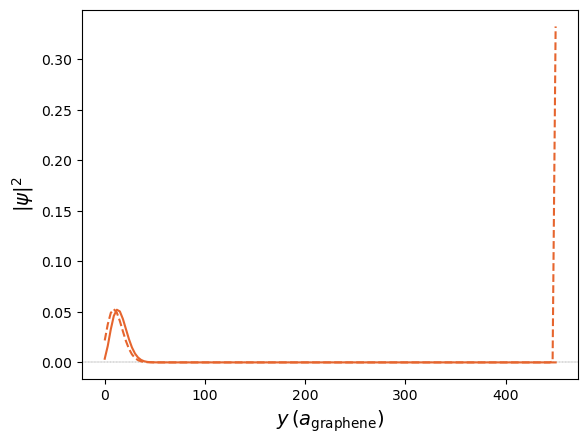

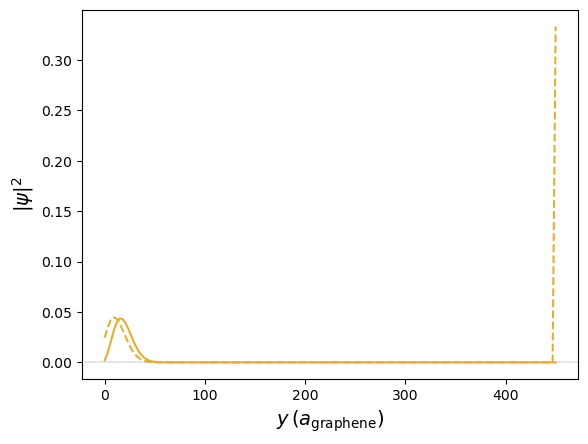

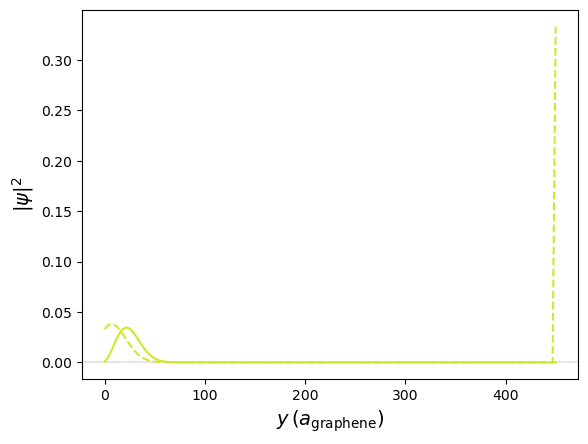

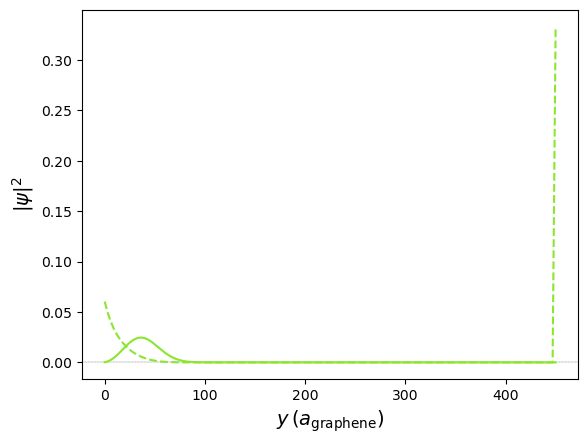

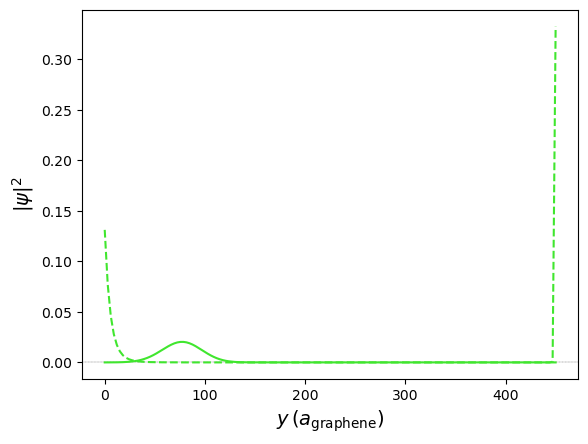

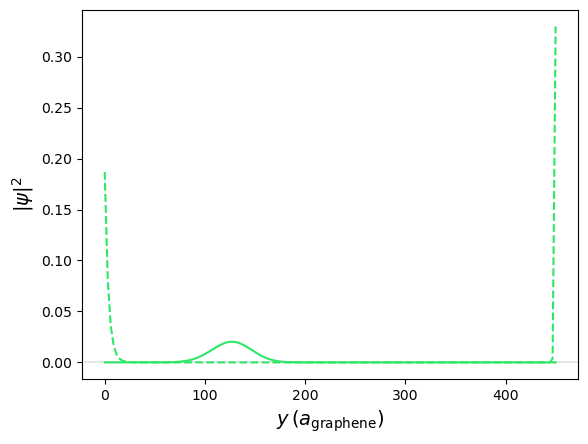

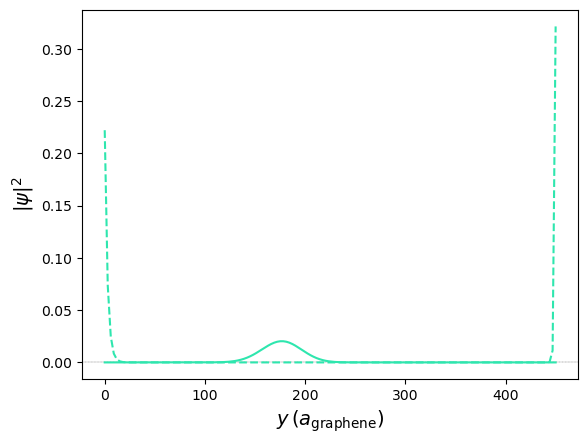

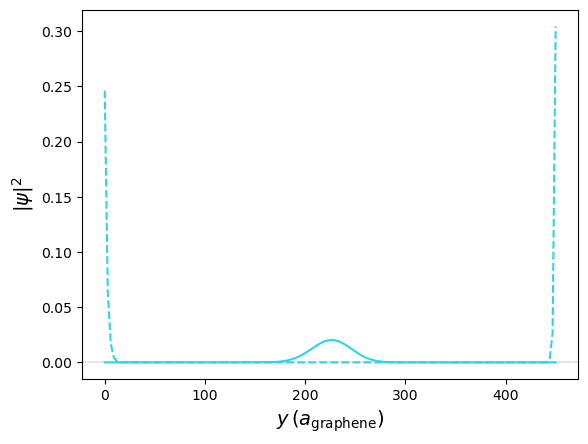

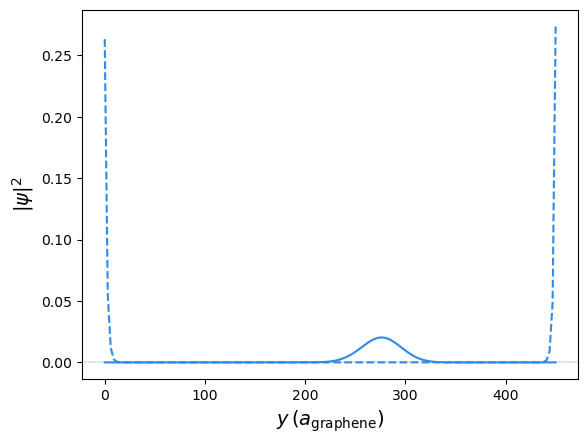

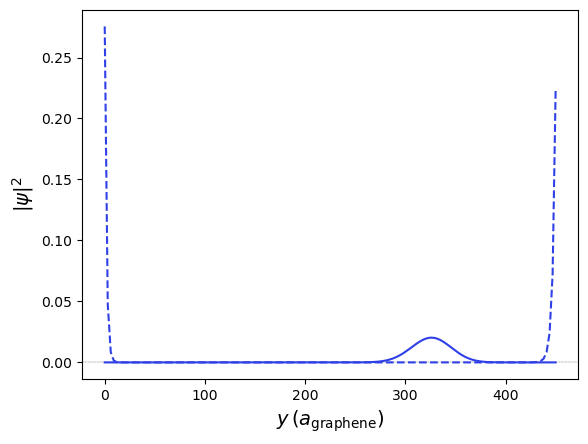

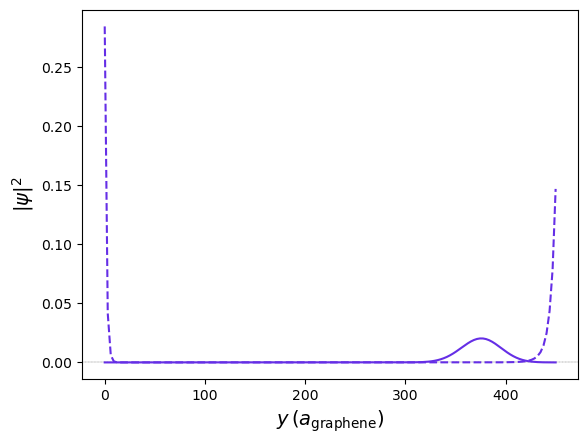

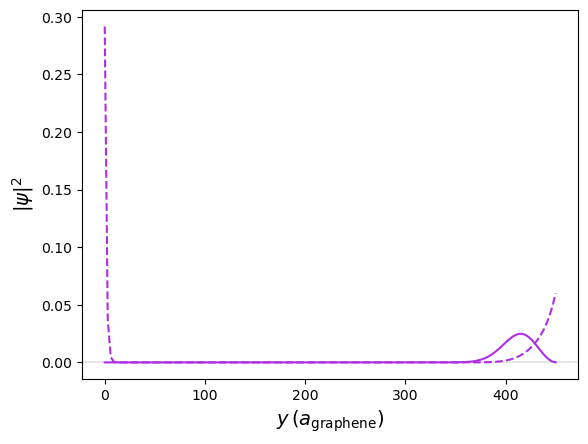

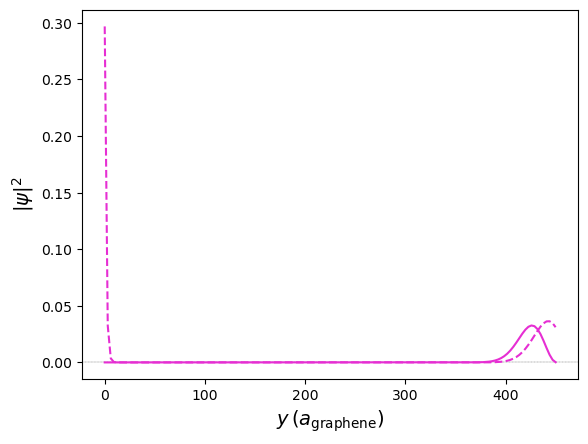

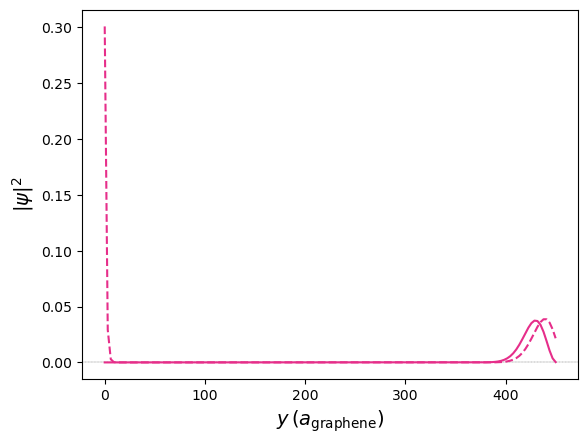

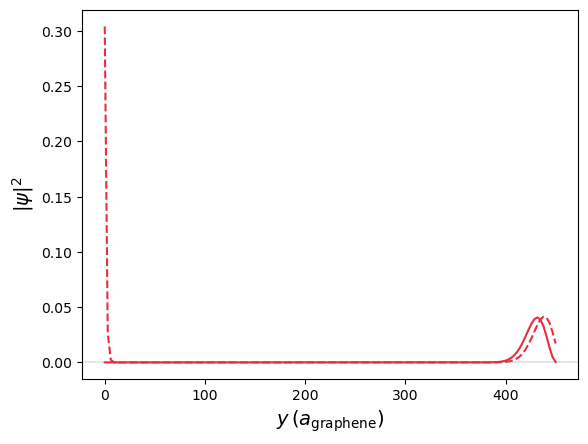

In [11]:
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):
    #Plot state
    figstate = plt.figure()
    axstate = figstate.add_subplot(111)
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3+np.abs(psi[0,:,1])**2/3 + np.abs(psi[2,:,1])**2/3+np.abs(psi[0,:,2])**2/3 + np.abs(psi[2,:,2])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3+np.abs(psi[1,:,1])**2/3 + np.abs(psi[3,:,1])**2/3+np.abs(psi[1,:,2])**2/3 + np.abs(psi[3,:,2])**2/3,c = rgb_colors[i]) ## sublattice b
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)

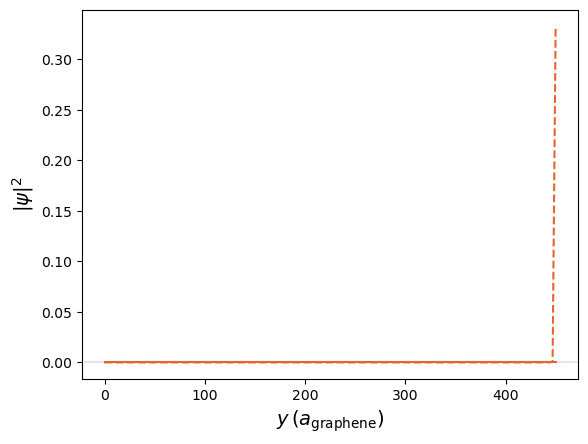

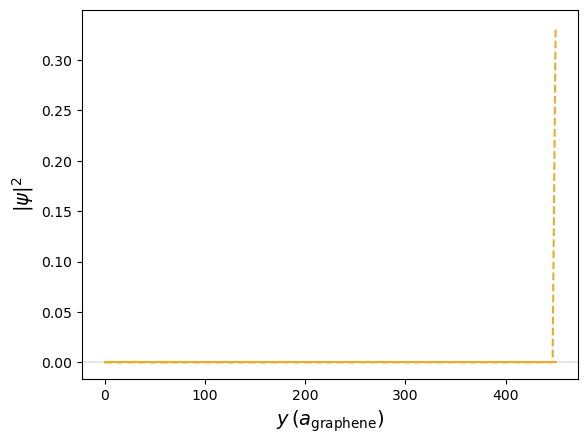

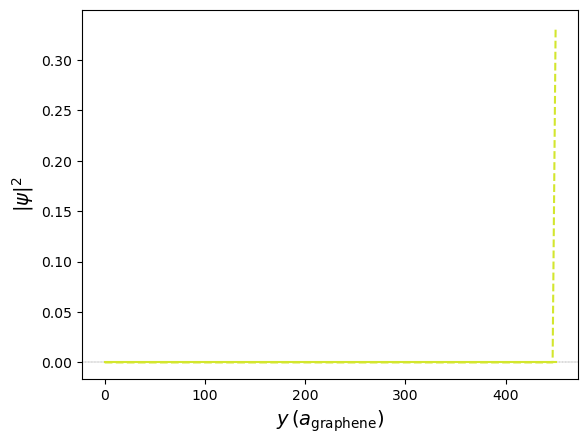

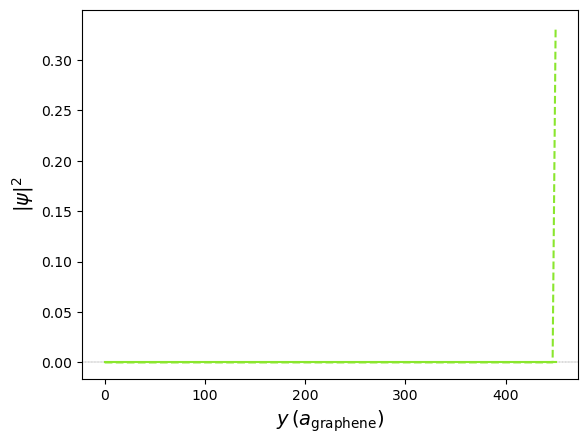

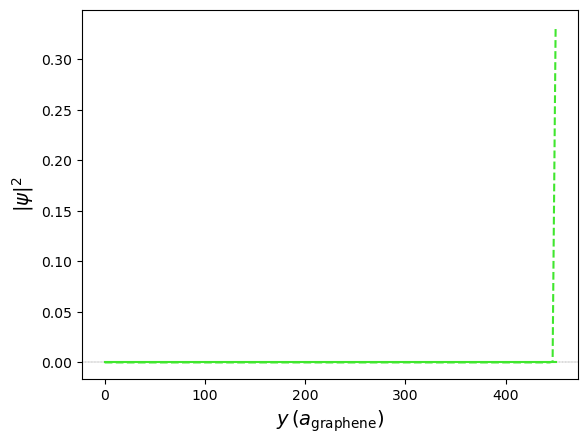

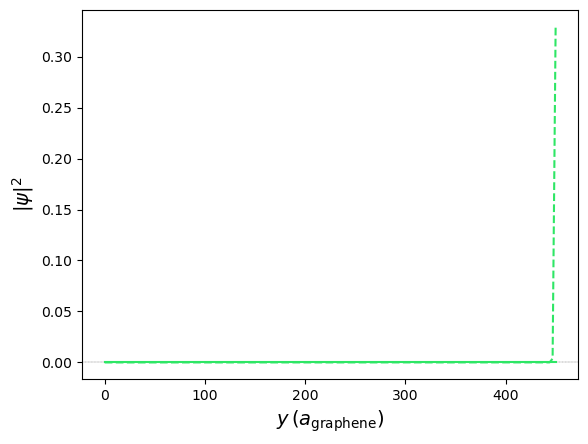

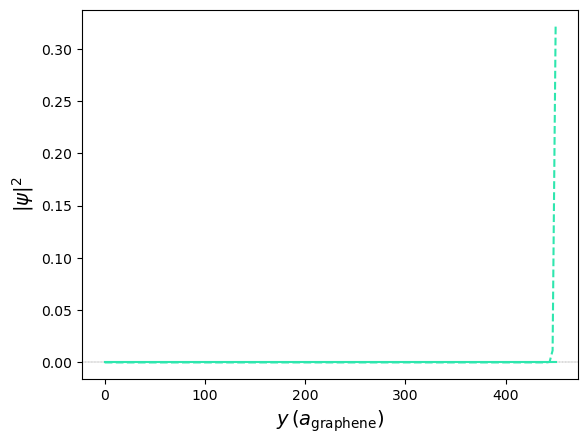

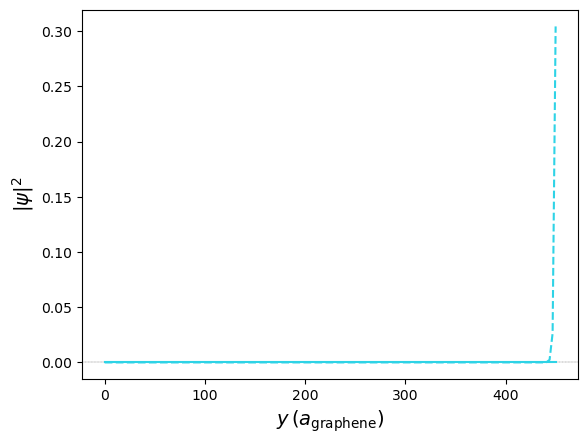

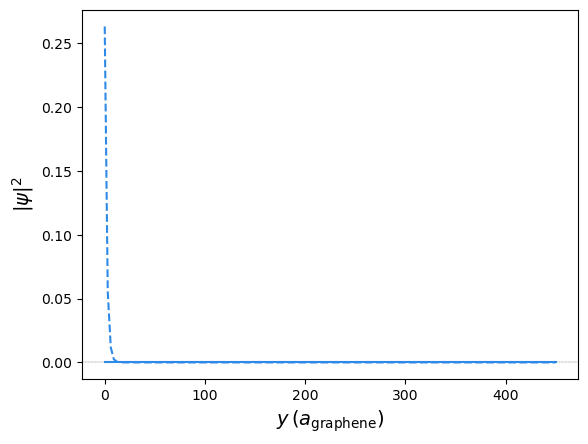

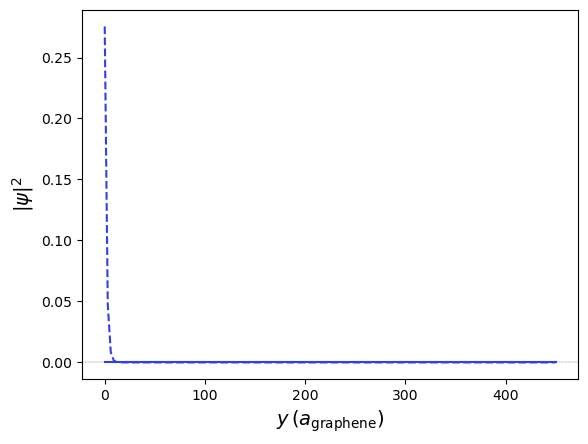

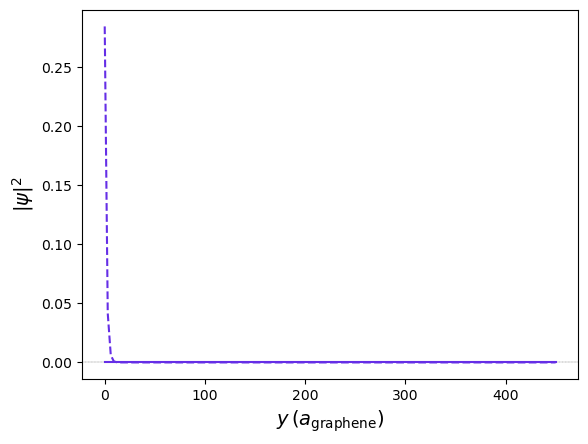

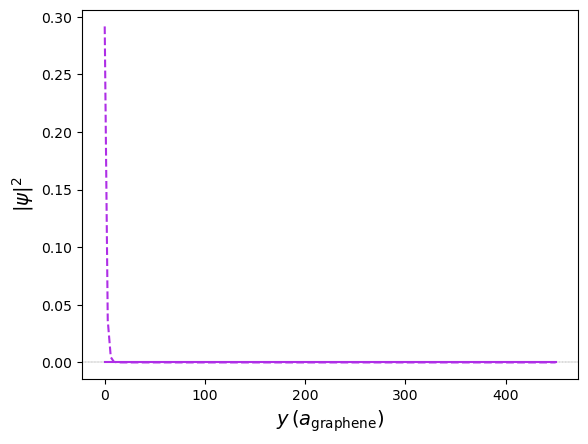

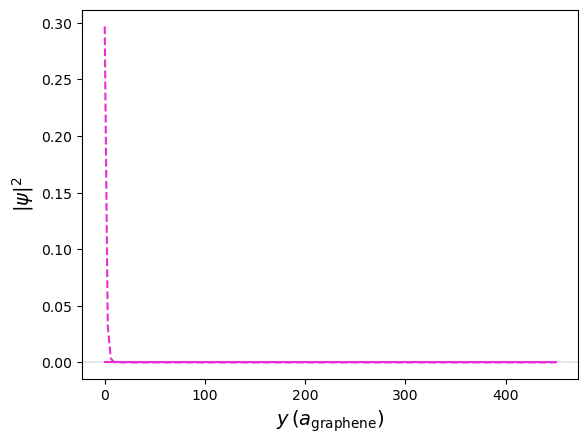

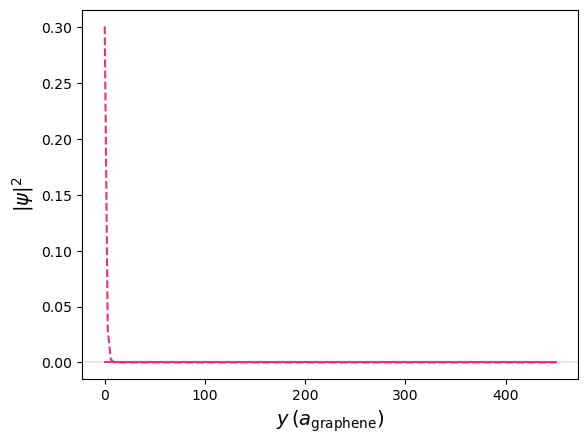

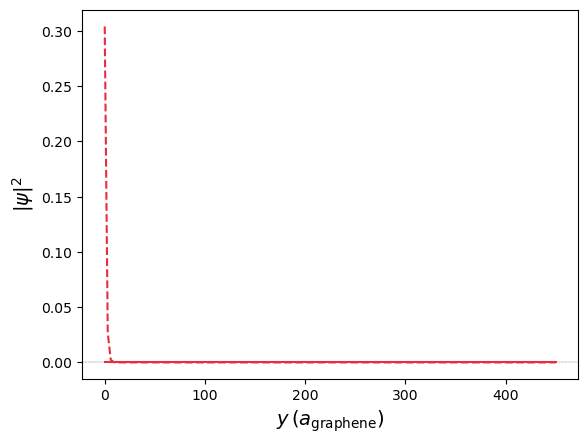

In [12]:
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):
    #Plot state
    figstate = plt.figure()
    axstate = figstate.add_subplot(111)
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3, c = rgb_colors[i],ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3,c = rgb_colors[i]) ## sublattice b
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)

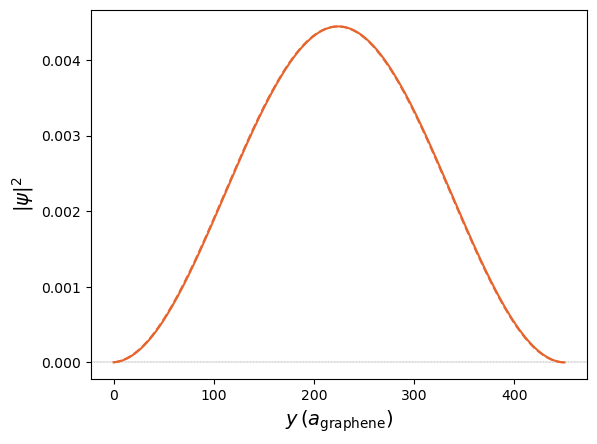

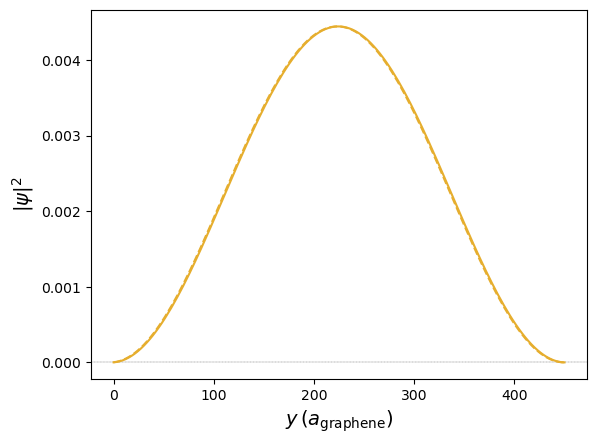

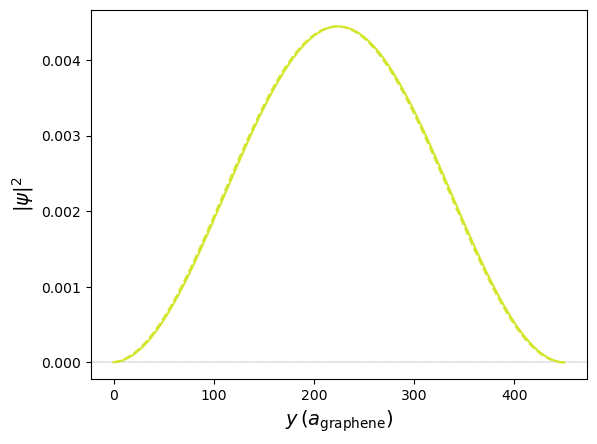

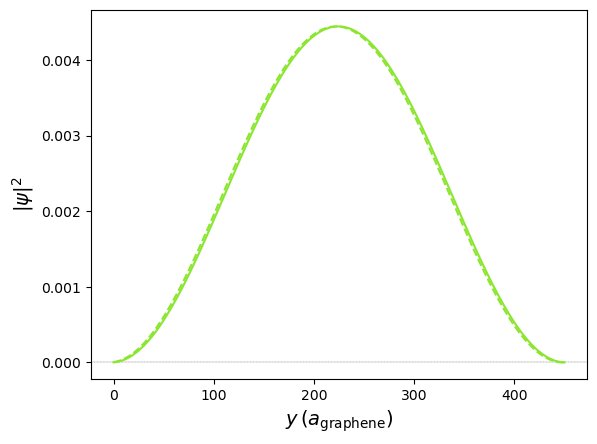

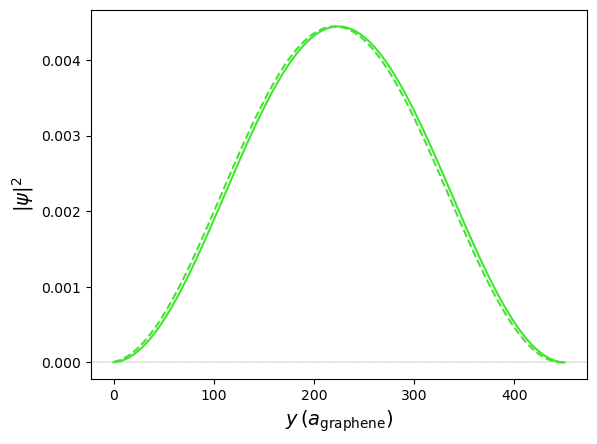

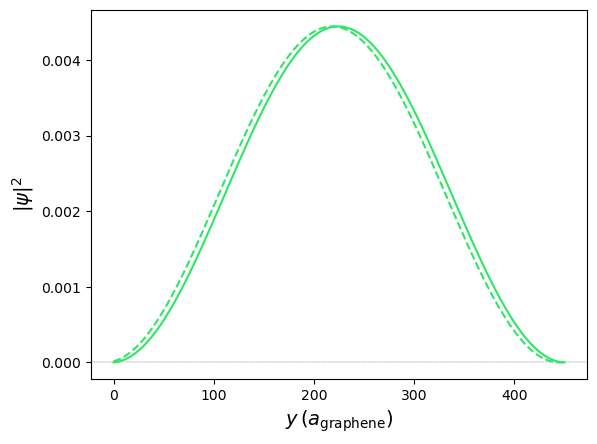

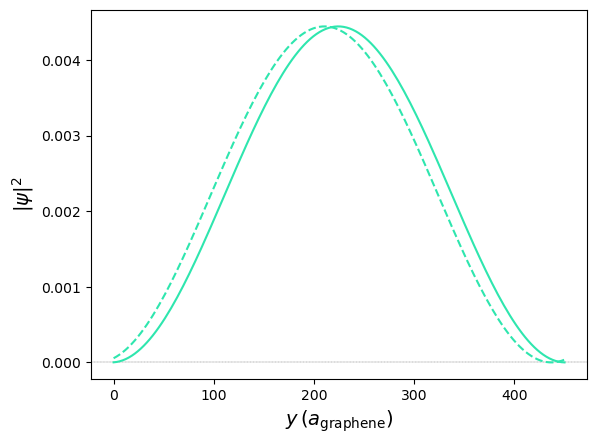

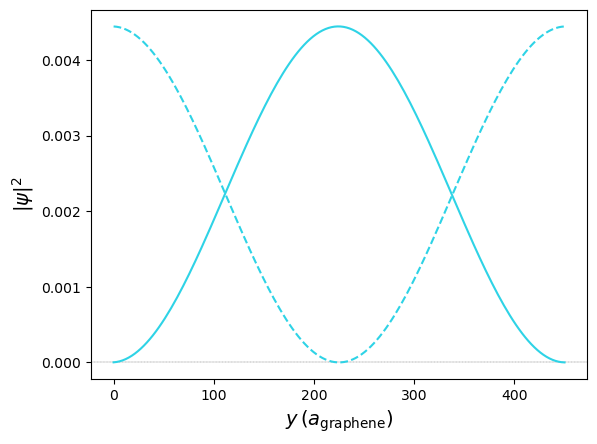

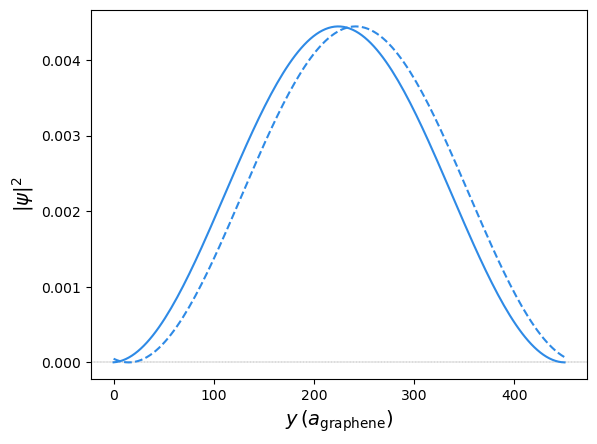

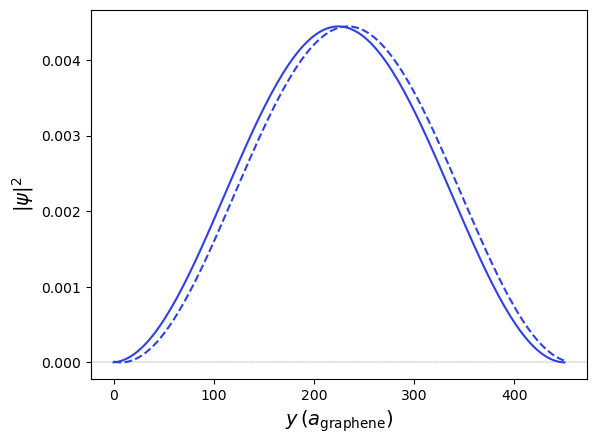

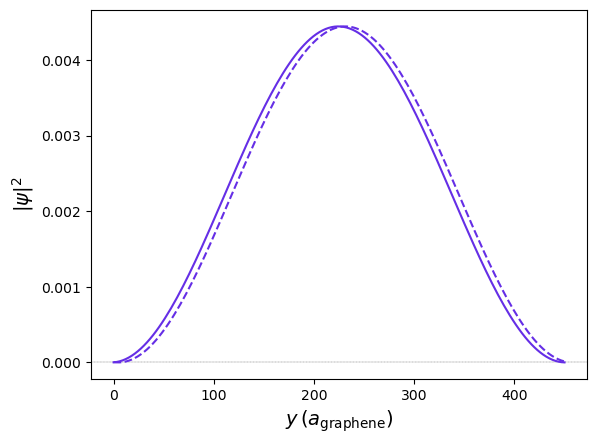

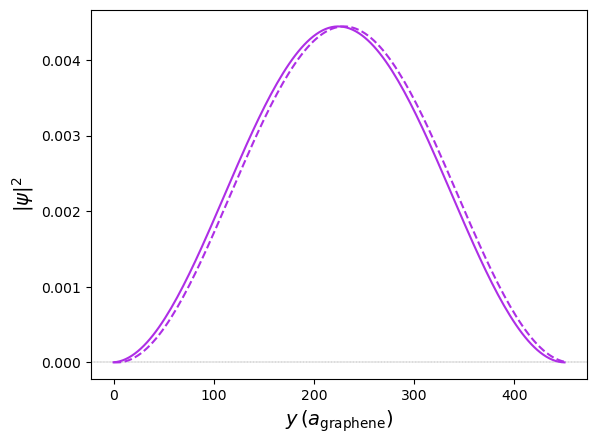

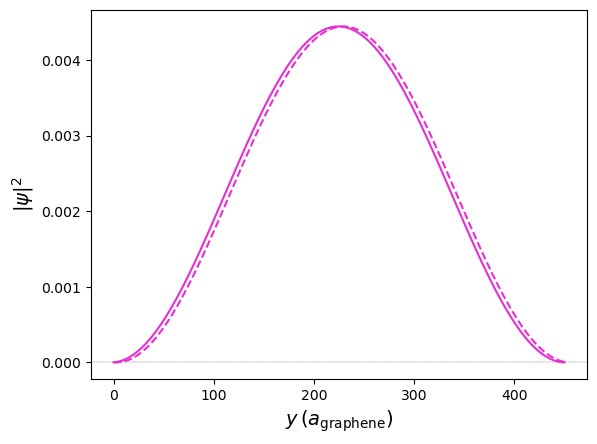

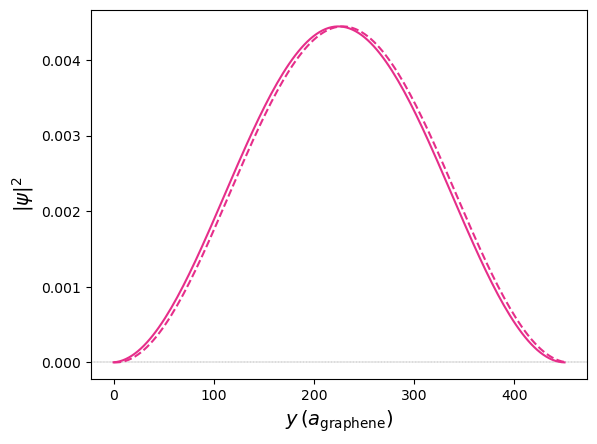

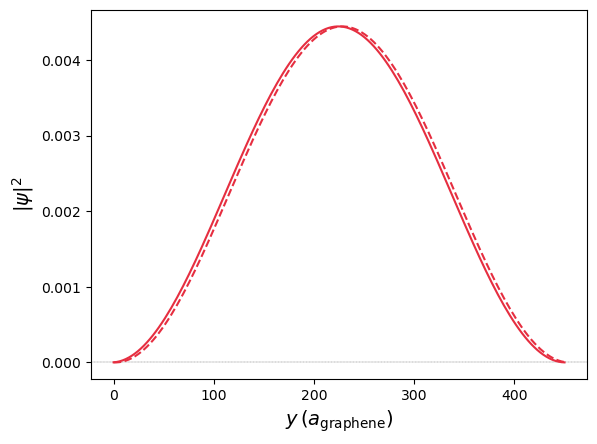

In [261]:
for i,shift in enumerate(np.linspace(-0.3-0.15,0.6-0.15,nplots)):
    #Plot state
    figstate = plt.figure()
    axstate = figstate.add_subplot(111)
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,1])**2/3 + np.abs(psi[2,:,1])**2/3+np.abs(psi[0,:,2])**2/3 + np.abs(psi[2,:,2])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,1])**2/3 + np.abs(psi[3,:,1])**2/3+np.abs(psi[1,:,2])**2/3 + np.abs(psi[3,:,2])**2/3,c = rgb_colors[i]) ## sublattice b
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)

# Fixing units

In order to compare properly the graphene and tangent fermions results, we need to make sure we are using the same parameters. For this, it is necessary to fid out the units of the different magnitudes.
First, I probably should scale the Hmailtonian by 1/fermi_vel so that its units are hbarv/a. (a_graphene of course)
The units of B then are hbar/e/a^2
Units of k are 1/a
Units of width are 3a

In [3]:
parameters = {
    'width' : 50, # This is in units of 3a
    'bottom_bearded' : False,
    'top_bearded' : True,
    'mag_field' : 0.005
    #'mag_field' : 0.0015
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 501)

/tmp/ipykernel_13557/1617639066.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]/fermi_vel], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_13557/1617639066.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


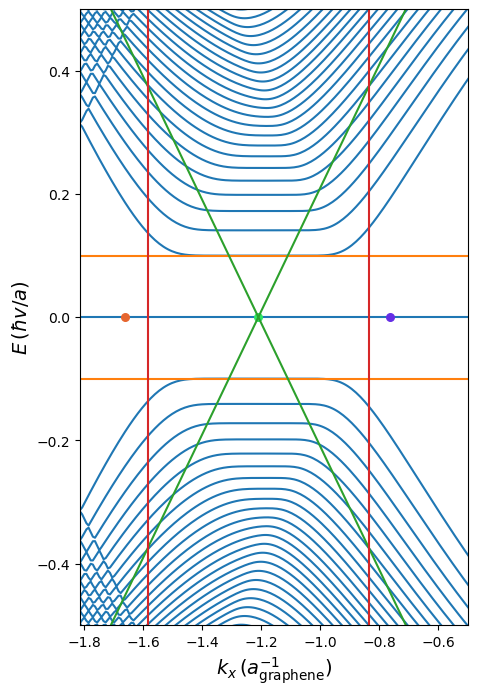

In [4]:
#Define color palette
rgb_colors = []
nplots = 3
fermi_vel = 3/2

for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))

#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i]/fermi_vel, c = 'C0')

ax.set_ylim(-0.5,0.5)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)

#Pintpoint states to plot
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):

    #Calculate eignestates at kplot and plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[energies[0]/fermi_vel], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    #ax.scatter([momenta[k_idx]],[energies[1]/fermi_vel], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[2]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

######These lines are useful to check units
ax.axhline(np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################  First Landau level
ax.axhline(-np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################
ax.axline((-2*pi/np.sqrt(3)/3,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
ax.axline((-2*pi/np.sqrt(3)/3,0), slope=-1, color='C2', label='by slope')########################################
ax.axvline(-2*pi/np.sqrt(3)/3+3*parameters['width']*parameters['mag_field']/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
ax.axvline(-2*pi/np.sqrt(3)/3-3*parameters['width']*parameters['mag_field']/2, c = 'C3')#######################
    
    
fig.show()


## Now let us build the same system with tangent fermions with a square lattice of side a

In [3]:
Lx = 1
Ly = 150

mag_field = 0.005
fluxes = mag_field*np.ones((Ly,Lx))
a_e, a_n = mb.vector_potential(Lx,Ly,fluxes, gauge = "Landau")

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    # theta_top = pi-0.01,
    # theta_bot = pi-0.01,
    theta_top = pi,
    theta_bot = pi,
    a_e = a_e,
    a_n = a_n,
    mass = 0,
    kx = 0,
    mag_field = mag_field
)


nbands = 50
kmin = -0.65/Lx#-pi/Lx
kmax = 0.65/Lx#pi/Lx
momenta, bands = mb.make_bands_x(parameters,number_of_bands = nbands, number_of_points = int(500), kmin = kmin, kmax = kmax)

/tmp/ipykernel_13557/3359157350.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(-0.65, 0.65)

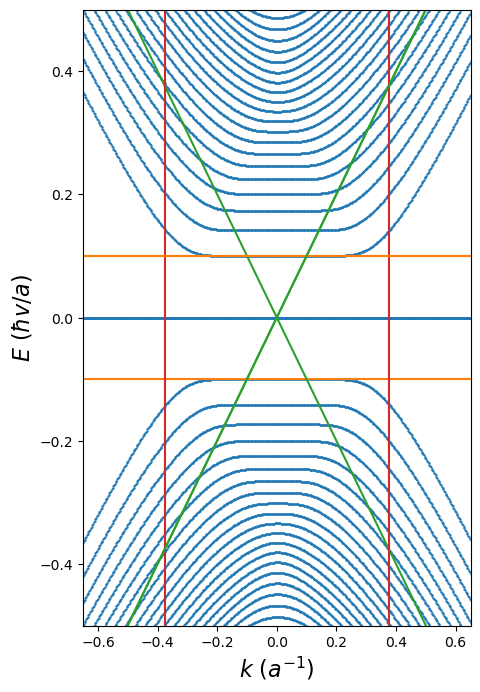

In [6]:
fig = plt.figure(figsize = (5,8))
axtan = fig.add_subplot(111)
for i in range(nbands):
    axtan.scatter(momenta, bands[:,i], c = 'C0', s = 0.5)
axtan.set_xlabel(r"$k$ $(a^{-1})$",fontsize = 16)
axtan.set_ylabel(r"$E$ $(\hbar v/a)$",fontsize = 16)

######These lines are useful to check units
axtan.axhline(np.sqrt(2*mag_field), c = 'C1')########################################################  First Landau level
axtan.axhline(-np.sqrt(2*mag_field), c = 'C1')########################################################
axtan.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
axtan.axline((0,0), slope=-1, color='C2', label='by slope')########################################
axtan.axvline(Ly*mag_field/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
axtan.axvline(-Ly*mag_field/2, c = 'C3')#######################
    
    
fig.show()
axtan.axhline(np.sqrt(2*mag_field), c = 'C1')######################################################## These lines are useful to check units
axtan.axline((0,0), slope=1, color='C2', label='by slope')########################################


axtan.set_ylim(-0.5,0.5)
axtan.set_xlim(kmin,kmax)

In [5]:
parameters = {
    'width' : 50, # This is in units of 3a
    'top_bearded' : True,
    'bottom_bearded' : True,
    'mag_field' : 0.005
    #'mag_field' : 0.0015
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 500)
momenta_center = momenta - 2*np.sqrt(3)/3*np.ones(len(momenta))


mag_field = parameters['mag_field']
fluxes = mag_field*np.ones((3*parameters['width'],1))
a_e, a_n = mb.vector_potential(1,3*parameters['width'],fluxes, gauge = "Landau")

parameters_tan = dict(
    Lx = 1,
    Ly = 3*parameters['width'],
    theta_top = pi*(1-parameters['top_bearded']),
    theta_bot = pi*parameters['bottom_bearded'],
    a_e = a_e,
    a_n = a_n,
    mass = 0,
    mag_field = mag_field
)


nbands = 50
momenta_tan, bands_tan = mb.make_bands_x(parameters_tan,number_of_bands = nbands, number_of_points = int(500), kmin = -pi/np.sqrt(3), kmax = pi/np.sqrt(3))

In [7]:
manual_shift = 0.06
momenta_center = momenta + (2*np.sqrt(3)/3+manual_shift)*np.ones(len(momenta))

/tmp/ipykernel_98428/4101717164.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


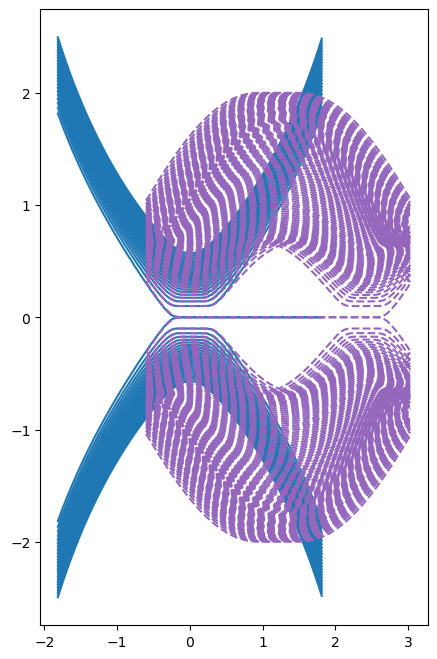

In [9]:
#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands_tan.shape[1]):
    ax.plot(momenta_tan,bands_tan[:,i], c = 'C0')

for i in range(bands.shape[1]):
    ax.plot(momenta_center,bands[:,i], c = 'C4',ls = 'dashed')

# ax.set_ylim(-0.2,0.2)
# ax.set_xlim(-0.5,0.5)
# ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
# ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)


# ######These lines are useful to check units
# ax.axhline(np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################  First Landau level
# ax.axhline(-np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################
# ax.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
# ax.axline((0,0), slope=-1, color='C2', label='by slope')########################################
# ax.axvline(3*parameters['width']*parameters['mag_field']/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
# ax.axvline(-3*parameters['width']*parameters['mag_field']/2, c = 'C3')#######################
    
    
fig.show()